# Analysis of Predis-MHI Data: 
##  *Notebook related to Chapter Two of the Thesis with title:
## Direct and indirect energy flexibility interactions at the Building and community scale: From system to the Human-interfaced systems


>***First time using a Jupyter Notebook ?*** In order to use this notebook online through the Mybinder public service, click the following icon  
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgricad-gitlab.univ-grenoble-alpes.fr%2FNanaKofi%2Fpredis_indirect_flexibility/master?labpath=Indirect_flex_assessment.ipynb)  

>You can then easily use this Jupyter notebook by runnning each cell with the Run ("Exécuter" in French) icon in the toolbar on top of the page. When the orange notebook icon in the tab turns into an hourglass, this means the code is still running. Do not hesitate to modify and adapt the code, working with Mybinder creates an online copy of the repository ipynb original file.

>## Data sources
* GReEN-ER (Predis-MHI) energy data (EV charging data, building energy usage, PV production) available at (https://mhi-srv.g2elab.grenoble-inp.fr/grafana/d/Xl5OAbQGk/ve-borne-de-rechargement?orgId=3&from=now-1y&to=now).

>## Objectives
In this notebook, we read and analyze the data related to Predis-MHI 

## Relevant imports
to run this notebook, the following libraries are required:
* pandas Version => 1.2.4
* numpy Version => 1.19.5
* plotly Version => 4.14.1



## The GreEn-ER Building in a nutshell

![green-er.png](../images/green-er.png)




>>The Predis – MHI (Monitoring and Habitat Intelligence) platform is a living lab that is housed in the GreEn-ER building. This is a smart building, commissioned in 2015, that is owned and operated by Grenoble Institute of Technology’s school of Energy, water and environment (École Nationale Supérieure de l'Énergie, l'Eau et l'Environnement - ENSE3). It houses the Grenoble Electrical Engineering lab with a total floor area of approximately 27000m² (6 floors, each with 4500m²).
 
>>The platform which is the demonstration zone of the GreEn-ER building was conceived to achieve net-zero energy status. The platform is constituted of 600m² of floor space composed of offices, lecture rooms, and experimental rooms which make up the demand, a Heating Ventilation and Cooling (HVAC) system, 22kWp of solar PV, four EV charging stations (each with two charging leads) and a 50 kWh lithium-ion battery. Typically, the demand for the platform is comprised of lighting, HVAC, electrical outlets (typically computers), and EV charging stations. The platform not only allows for innovation and experimentation of technological solutions but also allows for the evaluation of the human element (i.e. the occupant). Thus allowing for the development and testing of solutions in real-life settings.


## Zooming in on the predis-MHI platform

![predis.jpg](../images/predis.jpg)

### NOTE

The ``show_plots`` parameter is to allow for the plots to bre rendered in the GitLab repository (GitLab does not render html plots). If you want an interactive notebook set it to ``False`` and rerun the entire notebook.



Alternatively, an HTML version of this notebook is provided in the folder **html_files**

In [1]:
show_plots = True

In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.subplots as sp

## Load the data from CSV files 

In [3]:
df = pd.read_csv("..\data\predis_mhi_2015.csv", index_col = "Datetime", parse_dates = True, sep = ",",
                 decimal = ".")
df = df [df.index >= "2016-01-01"]
df["Total_consumption"]  = df[["charger 1","charger 2","charger 3","charger 4"]].sum(axis=1) + df["Consumption"]

df  = df[["production","Consumption", "Total_consumption" ,"charger 1","charger 2","charger 3","charger 4" ]]

df["Self_cons"]  =  np.minimum(df["production"] , df[f"Total_consumption"])

In [4]:
df.describe()

production   Consumption  Total_consumption     charger 1  \
count  61170.000000  61365.000000       61365.000000  35061.000000   
mean       2.477816      1.890524           2.169886      0.128378   
std        4.372846      1.500258           2.564261      1.204577   
min        0.000000      0.000000           0.000000      0.000000   
25%        0.000000      1.000000           1.000000      0.000000   
50%        0.000000      2.000000           2.000000      0.000000   
75%        3.000000      3.000000           3.000000      0.000000   
max       22.000000     35.000000          59.000000     32.995594   

          charger 2     charger 3     charger 4     Self_cons  
count  35063.000000  61367.000000  61367.000000  61168.000000  
mean       0.225081      0.045953      0.031450      0.864396  
std        1.568359      0.650877      0.500419      1.541980  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.000000      1.000000  
max       36.000000     22.000200     27.999885     17.000000

# Consumption

## Annual Consumption

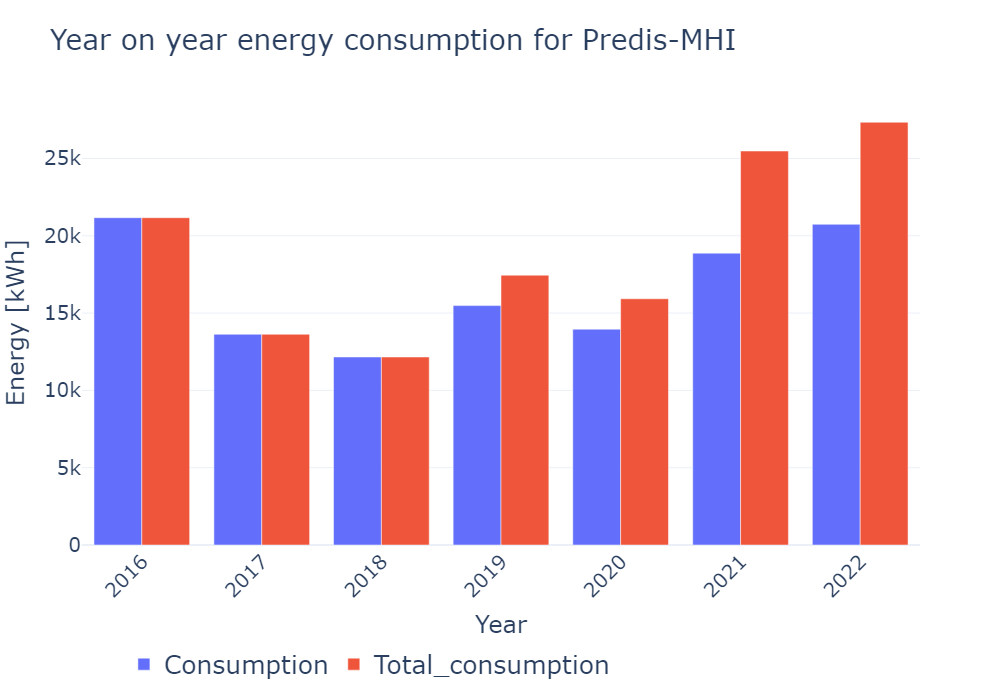

In [5]:
h = 700
layout = {"template" : "plotly_white" ,"height" : h,
          "font":{"size" : 20},
          'xaxis': { "title_text" : "Year","tickangle" : -45},
          "yaxis": {"title_text" : 'Energy [kWh]'},
         "legend" : {"tracegroupgap":10 ,"font_size": 25, "orientation":"h", "yanchor":"bottom",
    "y":-0.32,"x":0.05, "title" : ""}
         }

fig = px.bar(df[["Consumption","Total_consumption"]].resample("1Y", label="left").sum(),
             title = "Year on year energy consumption for Predis-MHI" , barmode = "group")
fig.update_layout(layout)


if show_plots:

    fig.show("png",width = 1000)
    
else:
    fig.show()

In [6]:
### Monthly Consumption

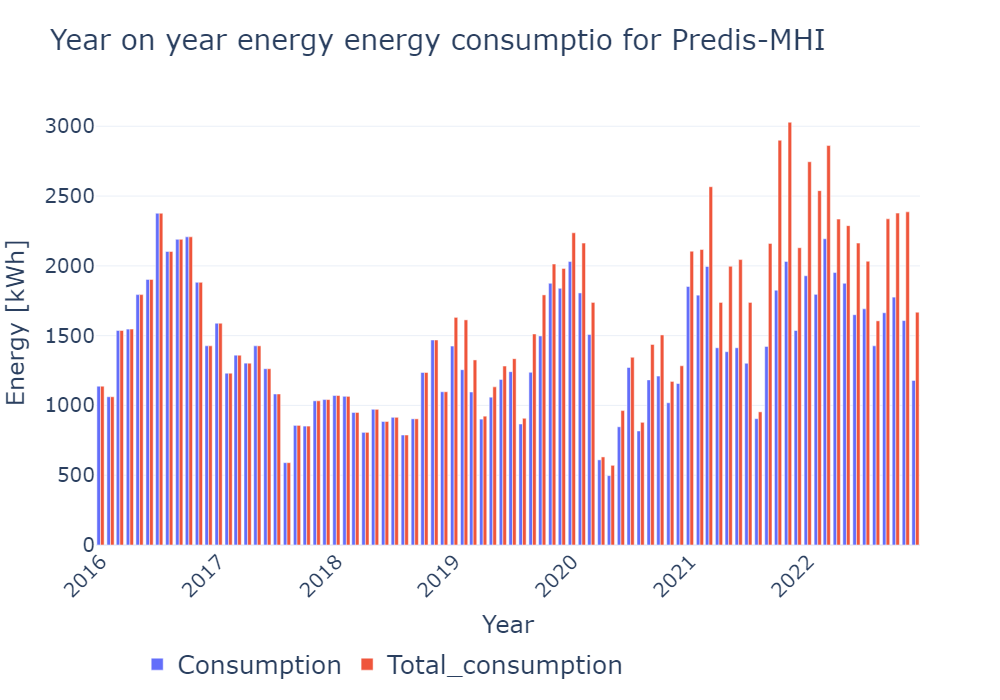

In [7]:



temp = df[["Consumption","Total_consumption"]].resample("1M", label="left").sum()

fig = px.bar(temp,title = "Year on year energy energy consumptio for Predis-MHI" , barmode = "group")

fig.update_layout(layout)



if show_plots:

    fig.show("png",width = 1000)
    
else:
    fig.show()

### comments


The demand curve is typical for Europe, lowest in summer and highest in winter (when heating is required)
There was annual growth in the demand except in 2020 which can be attributed to the covid-19 restrictions in France

### Annual Charger demand

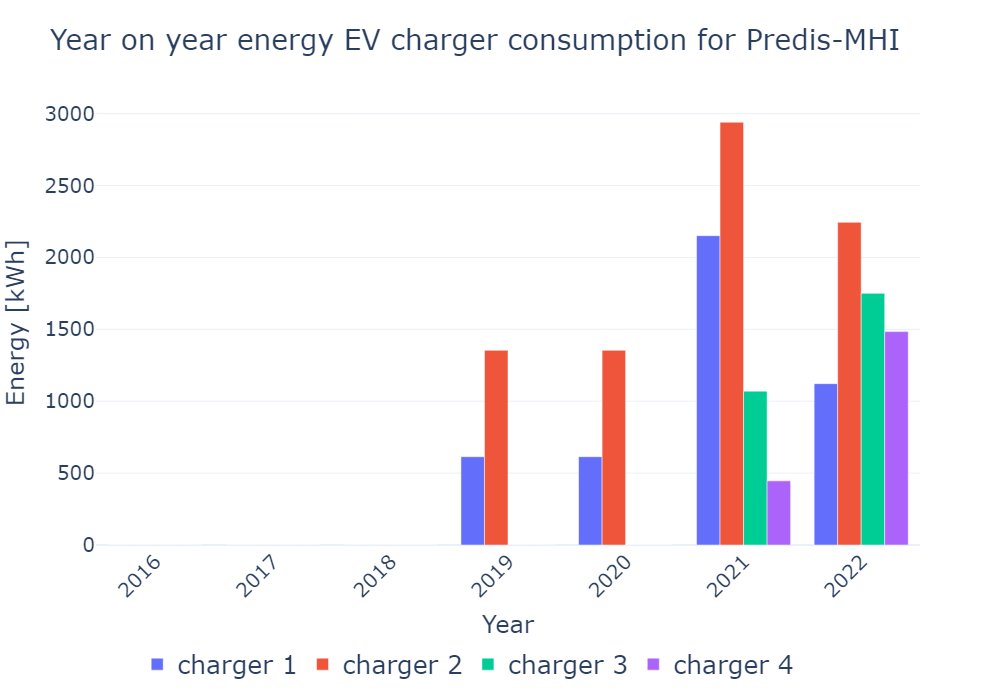

In [8]:


temp = df[["charger 1","charger 2","charger 3","charger 4"]].resample("1Y", label="left").sum()

fig = px.bar(temp,title = "Year on year energy EV charger consumption for Predis-MHI" , barmode = "group")
fig.update_layout(layout)

if show_plots:

    fig.show("png",width = 1000)
    
else:
    fig.show()

### comments
 
* EV demand is only present starting in 2019

* for 2020, the covid 19 restriction impacted the demand 

* in 2021 there was an addition of 2 new chargers 

## Annual PV Production

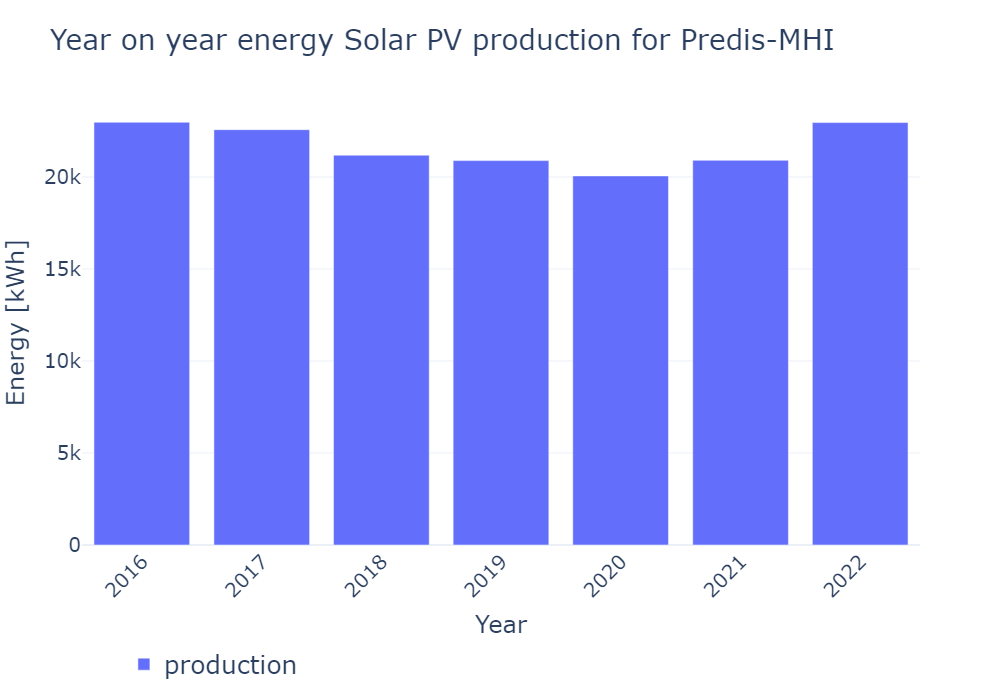

In [9]:
temp = df[["production"]].resample("1Y", label="left").sum()

fig = px.bar(temp,title = "Year on year energy Solar PV production for Predis-MHI" , barmode = "group")
fig.update_layout(layout)

if show_plots:

    fig.show("png",width = 1000)
    
else:
    fig.show()

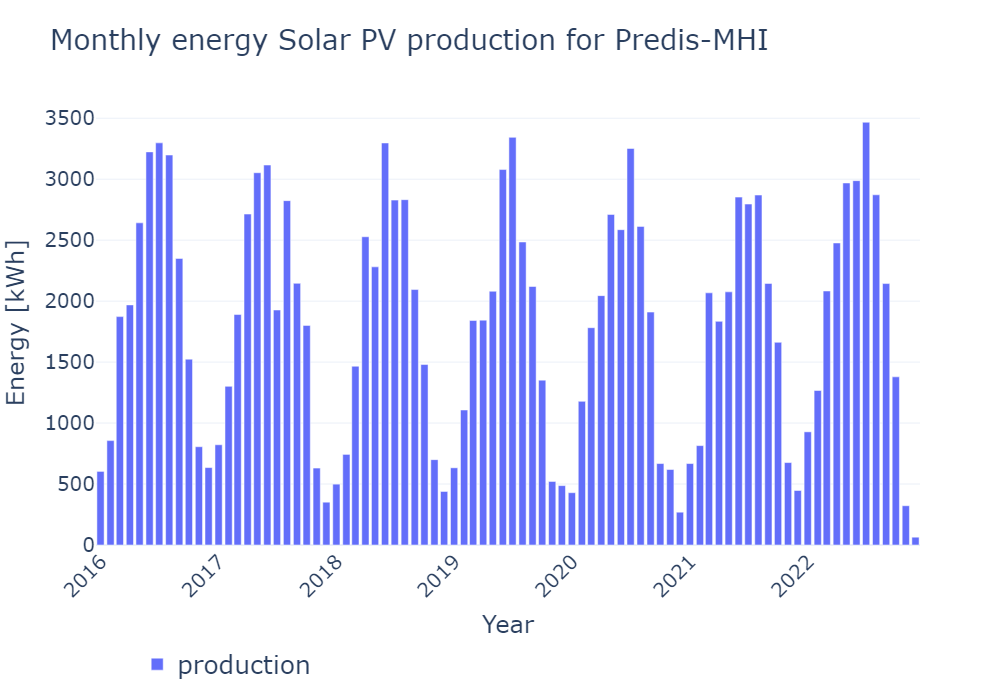

In [10]:
temp = df[["production"]].resample("1M", label="left").sum()

fig = px.bar(temp,title = "Monthly energy Solar PV production for Predis-MHI" , barmode = "group")
fig.update_layout(layout)

if show_plots:

    fig.show("png",width = 1000)
    
else:
    fig.show()

### Comments
looking at the annual PV production of from the 22kWh installation shows that there was little variation in the annual PV production, with 2020 being the lowest production year.

From the monthly plot, we ca see that the production follows the typical trend for Europe ,highest in the summer months (April, May, June, July) and is lowest during the winter months (November, December and January)

## Load Match Indicators

>#### Self-Consumption
This is the ratio of self-consumed energy to the production and provides an indication of how much of the local on-site production is being consumed locally.


>#### Self-Production
This is the ratio of self-consumed energy to the consumption. This indicator provides insight into how much of a building's demand is served by the local energy production resource.

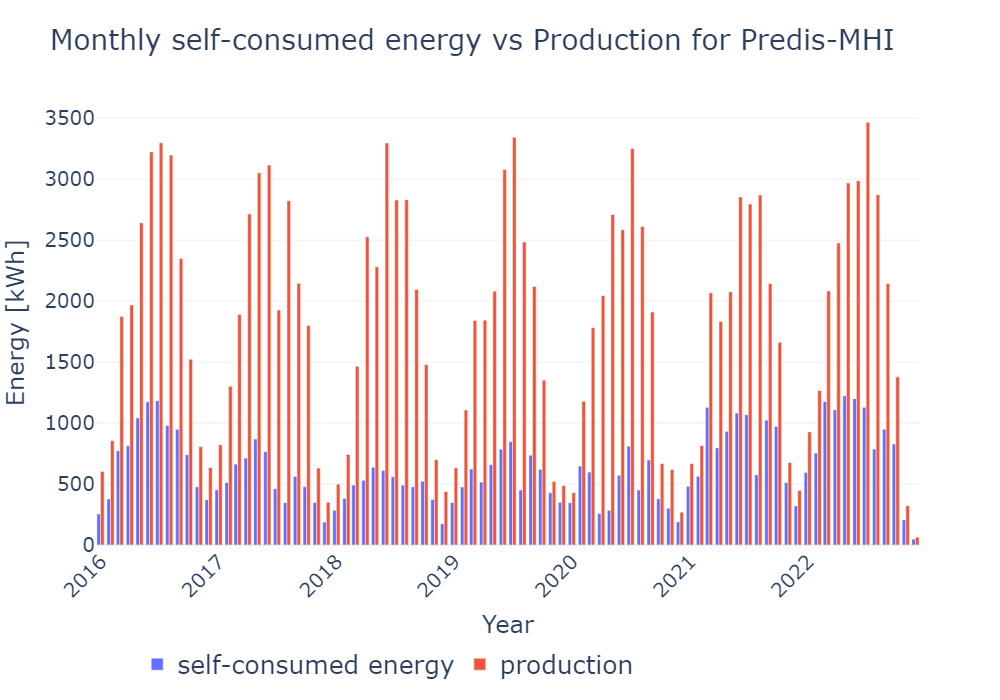

In [11]:
temp = df.resample("1M", label="left").sum()



fig = px.bar(temp, y = ["Self_cons","production"],title = "Monthly self-consumed energy vs Production for Predis-MHI" , barmode = "group")
fig.data[0].name = "self-consumed energy"
fig.update_layout(layout)

if show_plots:

    fig.show("png",width = 1000)
    
else:
    fig.show()

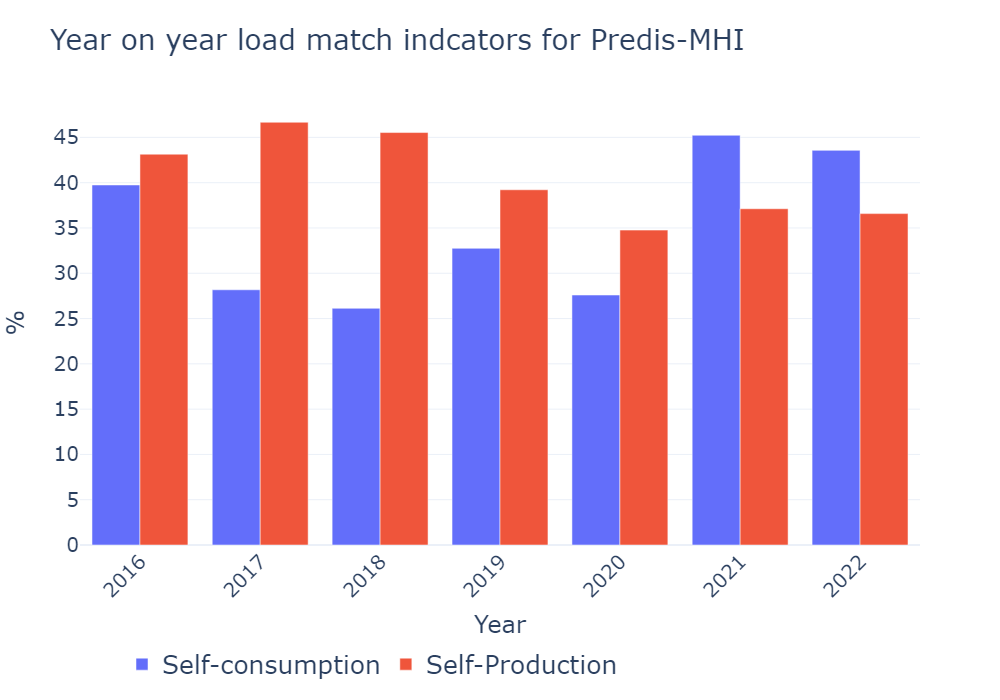

In [12]:
layout["yaxis"] = {"title_text" : "%"}

temp = df.resample("1Y", label="left").sum()

temp["Self-consumption"] =( temp["Self_cons"] / temp["production"]) * 100
temp["Self-Production"] =( temp["Self_cons"] / temp["Total_consumption"]) * 100

fig = px.bar(temp, y = ["Self-consumption","Self-Production"],title = "Year on year load match indcators for Predis-MHI" , barmode = "group")
fig.update_layout(layout)

if show_plots:

    fig.show("png",width = 1000)
    
else:
    fig.show()

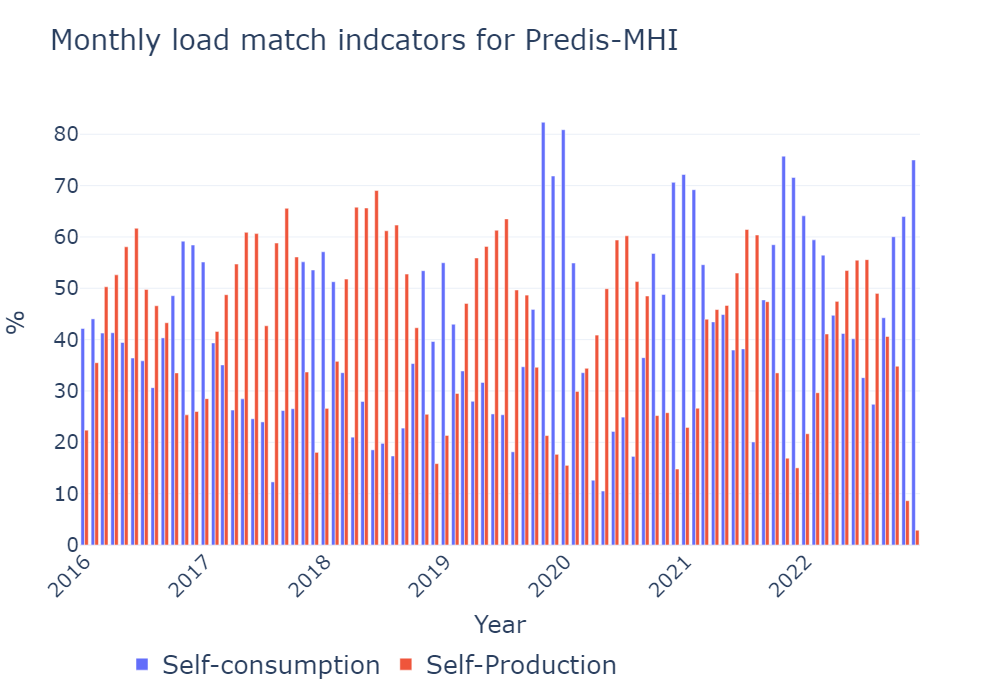

In [13]:
layout["yaxis"] = {"title_text" : "%"}

temp = df.resample("1M", label="left").sum()

temp["Self-consumption"] =( temp["Self_cons"] / temp["production"]) * 100
temp["Self-Production"] =( temp["Self_cons"] / temp["Total_consumption"]) * 100

fig = px.bar(temp, y = ["Self-consumption","Self-Production"],title = "Monthly load match indcators for Predis-MHI" , barmode = "group")
fig.update_layout(layout)

if show_plots:

    fig.show("png",width = 1000)
    
else:
    fig.show()

### Comment

* Self-consumption and self-production rates here are calculated without battery storage as the storage had not been implemented in the system

## Entire Data set

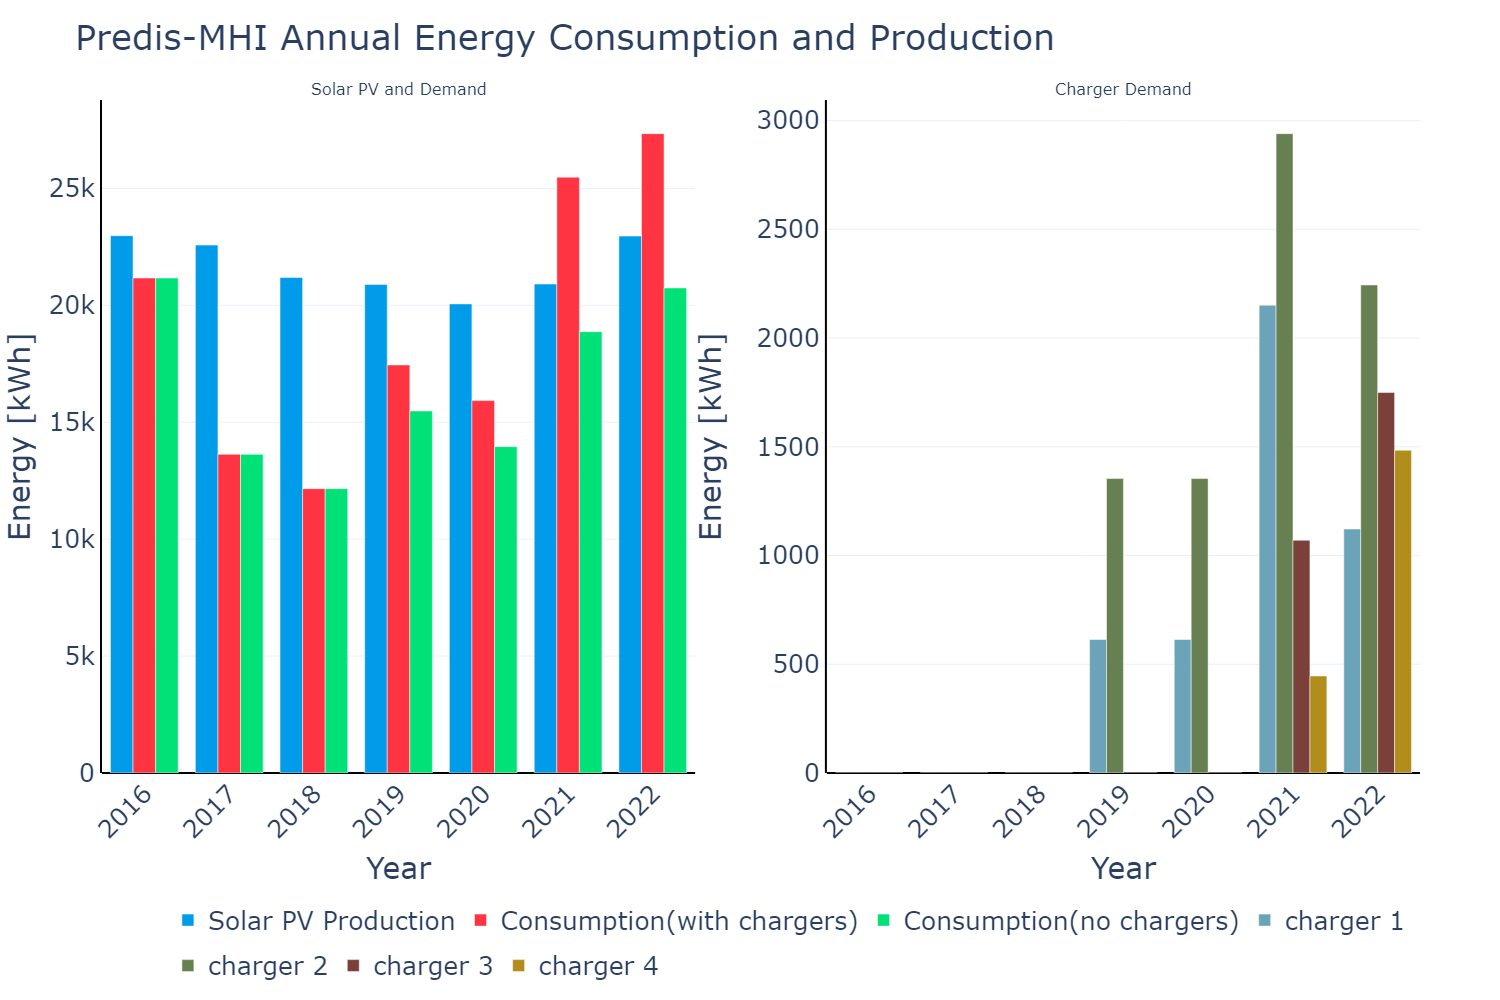

In [15]:


df_ = df.copy()
layout = {
   "font":{"size" : 25}, "template": "plotly_white", "width" : 2000, "height" : 1000,
    'xaxis': {'zerolinecolor':'black',"title_text" : "Year" ,"tickangle" : -45},
    'xaxis2': { "title_text" : "Year","tickangle" : -45},
    "yaxis": {"showline": True,"linecolor": "black", "linewidth": 2, 'zerolinecolor':'black',
              "side": 'left', "title_text" : "Energy [kWh]" },
    "yaxis2": {"showline": True,"linecolor": "black", "linewidth": 2,  'zerolinecolor':'black',
               "side": 'left', "title_text" : "Energy [kWh]", "overlaying": 'y' },
     "legend" : {"tracegroupgap":10 ,"font_size": 25, "orientation":"h", "yanchor":"bottom",
    "y":-0.32,"x":0.05, "title" : ""}
            }


df_["Consumption(no chargers)"] = df_["Consumption"]
df_y = df_.copy().resample("1Y", label = "left").sum()
df_y['total'] = df_y[["charger 1","charger 2","charger 3","charger 4"]].sum(axis=1)
df_y["Consumption(with chargers)"] =df_y["Consumption"] + df_y['total']


fig = px.bar(df_y, y = ["production","Consumption(with chargers)","Consumption(no chargers)"], 
             barmode = "group",color_discrete_sequence=["#009ce9","#ff3442","#00e277"])
fig.data[0]["name"] = "Solar PV Production"



y = [f"charger {i}" for i in range (1,5,1)]

fig1 = px.bar(df_y,y = y, barmode = "group", color_discrete_sequence=
             ["#6ba3b9","#678052","#7b4039","#b18d1c"])
figure = sp.make_subplots(rows=1, cols=2,subplot_titles=("Solar PV and Demand", "Charger Demand"))    



for trace in range(len(fig["data"])):
    figure.append_trace(fig["data"][trace], row=1, col=1)
    
for trace in range(len(fig1["data"])):
#     figure.data[-1].showlegend = False
    figure.append_trace(fig1["data"][trace], row=1, col=2)
    
figure.update_layout(layout, title = "Predis-MHI Annual Energy Consumption and Production")

if show_plots:

    figure.show("png",width = 1500)
    
else:
    figure.show()